## 一个简单示例：y=w*x

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

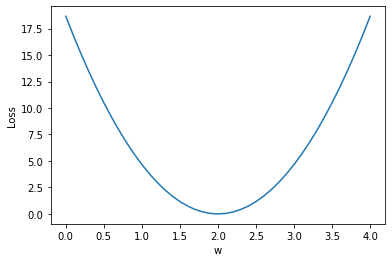

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


# 返回预测值
def forward(x):
    return x * w


# 损失函数
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


# 穷举法
w_list = []  # 存储不同的参数w
mse_list = []  # 存储不同参数w下的均方误差MSE
for w in np.arange(0.0, 4.1, 0.1):
    print('w=', w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)  # 预测值
        loss_val = loss(x_val, y_val)  # 一个样本损失值
        l_sum += loss_val  #把每个样本的损失值求和
        print('\t', x_val, y_val, y_pred_val, loss_val)
    print('MSE=', l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)
plt.plot(w_list, mse_list)
plt.xlabel('w')
plt.ylabel('Loss')
plt.show()

以上可以发现w=2时均方误差MSE最小

zip函数用法：

In [47]:
list(zip(x_data, y_data))  # zip可以把两个数据压缩打包; list可以把zip解压成列表

[(1.0, 3.0), (2.0, 5.0), (3.0, 7.0)]

## 作业：y=w*x+b

w: 1.9999999999999996 b: 1.0 MSE: 1.3805065841367707e-30


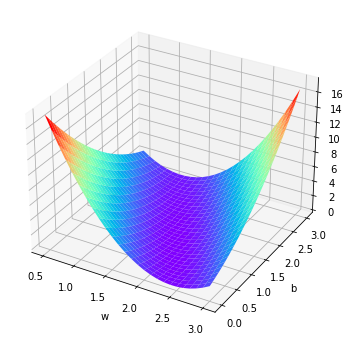

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# 这里假设真实方程为:y=2*x+1
x_data = [1.0, 2.0, 3.0]
y_data = [3.0, 5.0, 7.0]


# 返回预测值
def forward(x):
    return x * w + b


# 损失函数
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)


mse_list = []  # 存储不同参数下的均方误差MSE
w_list = np.arange(0.5, 3.1, 0.1)
b_list = np.arange(.0, 3.1, 0.1)
i = 0
# 穷举
for w in w_list:
    for b in b_list:
        l_sum = 0
        for x_val, y_val in zip(x_data, y_data):
            y_pred_val = forward(x_val)  # 预测值
            loss_val = loss(x_val, y_val)  # 一个样本损失值
            l_sum += loss_val  #把每个样本的损失值求和
        mse_list.append(l_sum / 3)
        # print('w:', w, 'b:', b, 'MSE:', l_sum / 3)
        if i == 475:
            print('w:', w, 'b:', b, 'MSE:', l_sum / 3)
        i += 1

# 绘图
ll_sum = 0
[ww, bb] = np.meshgrid(w_list, b_list)
for x_val, y_val in zip(x_data, y_data):
    loss = (ww * x_val + bb - y_val) ** 2
    ll_sum += loss
fig = plt.figure(figsize=[10, 6])
ax = plt.axes(projection="3d")
ax.plot_surface(ww, bb, ll_sum / 3, cmap="rainbow")
ax.set_xlabel('w')
ax.set_ylabel('b')
plt.show()

在这么多输出中找出使损失函数最小的w和b:

In [92]:
min(mse_list), mse_list.index(min(mse_list))

(1.3805065841367707e-30, 475)

再回源代码中上面34行处写if语句当索引为475时输出对应的w b，重新运行。